In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt         
import matplotlib.dates as dates
from mpl_toolkits.mplot3d import Axes3D

from datetime import datetime

import statsmodels.formula.api as sm

from scipy.optimize import fsolve

import random

In [2]:
from fbm import FBM
from fbm import fbm, fgn, times
from fbm import MBM
from fbm import mbm, mgn, times

import math

In [261]:
def MMAR(K, simulated_H, original_price_history, magnitude_parameter, GRAPHS):

    # --- VARIABLES ---
    # K
        # adjust K depending on how many days you want to simulate (e.g. if K=13, you'll simulate 2^13=8192 days)
    # simulated_H
        # the Hurst parameter for the fBm process
    # simulated_lambda
        # the mean for the lognormal cascade
    # simulated_sigma
        # the variance for the lognormal cascade
    # original_price_history
        # the price history of the market under study (used for starting the prices from the right time!)
    # magnitude_parameter
        # adjust this up or down to change the range of price changes (e.g. if prices are swinging too wildly every day, then adjust this downwards)
    # GRAPHS
        # Boolean - either True or False - use True if you want the MMAR to simulate graphs for you
        

    # --- TRADING TIME ---
    tradingtime = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                   9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5,
                   15, 16.5, 18, 19.5, 21, 22.5, 24, 25.5, 27]
                  
    if GRAPHS == True:
        plt.title("Trading time (normalized)")
        plt.xticks(np.arange(0, 3**(K)+1, 3**(K-2)))
        plt.yticks(np.arange(0, 3**(K)+1, 3**(K-2)))
        
        plt.xlabel("Conventional time\n(days)")
        plt.ylabel('"Trading time"\n(\u03B8 (t), normalized)')
        
        plt.plot(tradingtime, color="orangered", marker="+", markersize = 10)
        plt.fill_between([0,9],[27,27],alpha=0.1, label = "1x speed")
        plt.fill_between([9,18],[27,27],alpha=0.1, label = "0.5x speed")
        plt.fill_between([18,27],[27,27],alpha=0.1, label = "1.5x speed")
        
        plt.axhline(9, color="black", linestyle=':', linewidth=3)
        plt.axhline(13.5, color="black", linestyle=':', linewidth=3)
        
        plt.legend(ncol = 3)
        plt.show()

        
    # --- FBM (Fractional Brownian Motion) ---
    new_fbm_class = FBM(n = 10*3**K+1, hurst = simulated_H, length = magnitude_parameter, method='daviesharte')
    new_fbm_simulation = new_fbm_class.fbm()
    if GRAPHS == True:
#         plt.figure(figsize=(24,2))
        plt.xticks(np.arange(0, 10*3**(K)+1, 10*3**(K-2)))
        plt.title("Fractional Brownian Motion (fBm)")
        plt.xlabel("t")
        plt.ylabel('fBm (t)')
        plt.plot(new_fbm_simulation, color="orange", label = "fBm(t)")
        for i in range(0, len(tradingtime)):
            plt.scatter(tradingtime[i]*10, new_fbm_simulation[int(tradingtime[i]*10)], color="orangered", marker="x", s = 50)
        plt.scatter(tradingtime[1]*10, new_fbm_simulation[int(tradingtime[1]*10)], color="orangered", marker="x", s = 50, label = "fBm(\u03B8(t))")
        plt.axvline(9 *10, color="black", linestyle=':', linewidth=3)
        plt.axvline(13.5 *10, color="black", linestyle=':', linewidth=3)
        plt.legend()
        plt.show()

        
    # --- MMAR XT's ---
    simulated_xt_array = [0 for x in range(0, len(tradingtime))]

    for i in range(0, len(tradingtime)):
        simulated_xt_array[i] = new_fbm_simulation[int(tradingtime[i]*10)]

    if GRAPHS == True:
        plt.title("MMAR generated Xt")
        plt.xticks(np.arange(0, 3**(K)+1, 3**(K-2)))
        plt.xlabel("Time\n(days)")
        plt.ylabel('X(t)\n(Natural log growth since beginning)')
        plt.grid(b=True)
#         plt.fill_between(np.arange(0, 3**K+1, 1) , simulated_xt_array, color="darkviolet", alpha=0.2)
        plt.plot(simulated_xt_array, color="darkviolet", label = "X(t) = fBm(\u03B8(t))")
        plt.axvline(9, color="black", linestyle=':', linewidth=3)
        plt.axvline(18, color="black", linestyle=':', linewidth=3)
        plt.legend()
        plt.show()


    # --- PRICES ---
    if GRAPHS == True:
        plt.title("MMAR generated Price")
        plt.xticks(np.arange(0, 3**(K)+1, 3**(K-2)))
        plt.xlabel("Time\n(days)")
        plt.ylabel('Price level')
        plt.grid(b=True)
        plt.fill_between(np.arange(0, 3**K+1, 1) , original_price_history[0]*np.exp(simulated_xt_array), color="limegreen", alpha=0.2)
        plt.show()

        
    # --- LN CHANGES ---
    if GRAPHS == True:
        ln_simulated_xt_array = [0 for x in range(0, len(simulated_xt_array)-1)]

        for i in range(1,len(simulated_xt_array)):
            ln_simulated_xt_array[i-1] = np.log((original_price_history[0]*np.exp(simulated_xt_array[i]))/(original_price_history[0]*np.exp(simulated_xt_array[i-1])))
            
        plt.figure(figsize=(24,5))
        plt.title("Price increments")
        plt.xlabel("Time\n(days)")
        plt.ylabel('Change\n(%)')
        plt.grid(b=True)
        plt.plot(ln_simulated_xt_array, color="darkviolet", linewidth=0.5)
        plt.gca().set_yticklabels(['{:.0f}'.format(x*100) for x in plt.gca().get_yticks()]) 
        plt.show()
        print("The number of price increments that equal zero is: " + str(list(np.abs(ln_simulated_xt_array)).count(0)))
    
    # --- END ---
    return simulated_xt_array

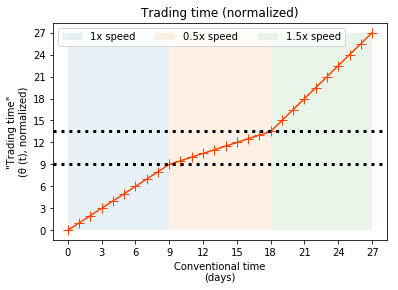

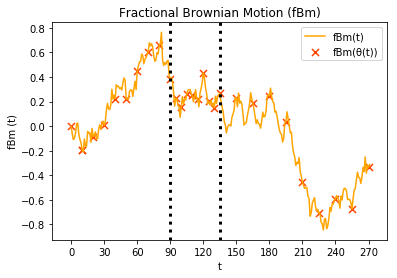

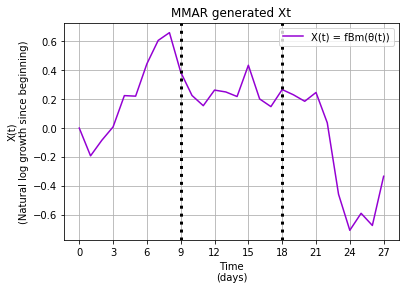

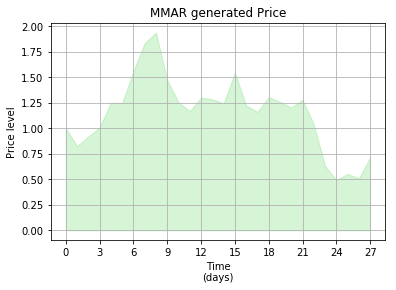

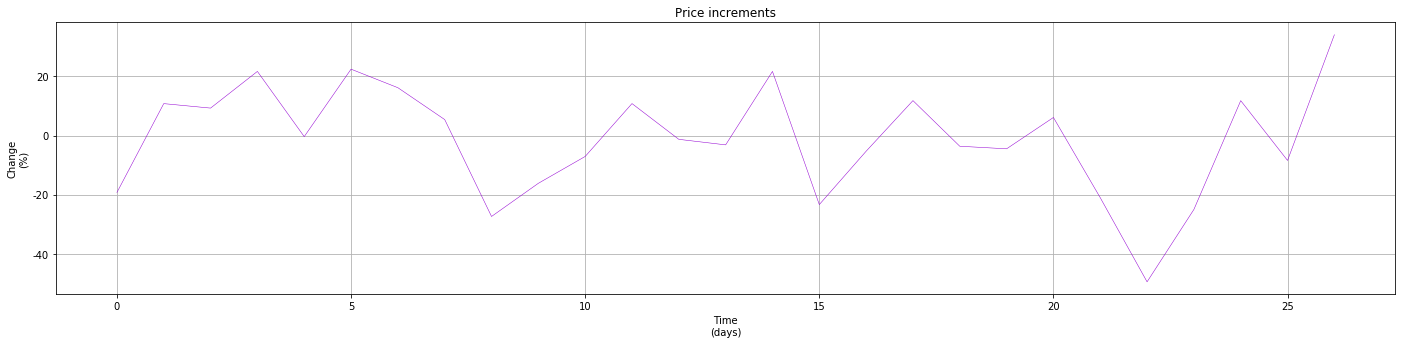

The number of price increments that equal zero is: 0


In [271]:
for_handdrawn_diagram = MMAR(3, 0.5, [1], 1, True)